# Mounting drive and imports

**Mount google drive**

This will mount the google drive for google colab and you will be able access contents of your drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import os
# Add your directory path here
os.chdir('/content/drive/My Drive/Deep_learning_unit/Assessment')

Mounted at /content/drive


In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 16.9 MB/s eta 0:00:00


**Importing libraries**

The tf.keras.datasets package in TensorFlow provides prebuilt utility functions for loading many common datasets.

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from keras import layers, applications, Model, Input
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, MaxPool2D, GlobalAveragePooling2D
from keras.models import Model, load_model, Sequential
from keras.regularizers import l1, l2, l1_l2
from keras.preprocessing import image
from keras.utils import layer_utils, to_categorical
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import visualkeras
from cycler import cycler
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

/usr/local/lib/python3.8/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


# Load in dataset

**Loading dataset**

First, we load the CIFAR-10 dataset. This might take a few minutes to download the first time you run it, but after that the files should be cached on disk and loading should be faster.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another.

In [ ]:
def load_cifar10(num_training=50000, num_test=10000):
    """
    Fetch the CIFAR-10 dataset from the web.
    """
    # Load the raw CIFAR-10 dataset and use appropriate data types and shapes
    cifar10 = tf.keras.datasets.cifar10.load_data()
    (X_train, y_train), (X_test, y_test) = cifar10
    X_train = np.asarray(X_train, dtype=np.float32)
    y_train = np.asarray(y_train, dtype=np.int32).flatten()
    X_test = np.asarray(X_test, dtype=np.float32)
    y_test = np.asarray(y_test, dtype=np.int32).flatten()


    # Normalize the data: subtract the mean pixel and divide by std
    mean_pixel = X_train.mean(axis=(0, 1, 2), keepdims=True)
    std_pixel = X_train.std(axis=(0, 1, 2), keepdims=True)
    X_train = (X_train - mean_pixel) / std_pixel
    X_test = (X_test - mean_pixel) / std_pixel

    return X_train, y_train, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_test, y_test = load_cifar10()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape, y_train.dtype)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
Train data shape:  (50000, 32, 32, 3)
Train labels shape:  (50000,) int32
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


# Final CNN Model

### The model architecture

This model achieved the greatest results from all the experiments done that involved the implemented model. Implementing InceptionResNetV2 via transfer learning was the greatest result of all experiments.


Total parameters: 552,874

Trainable parameters: 551,722

Non-trainable parameters: 1,152


This experimented on: 

*   The number of and order of different layers
*   Different number of filters, filter sizes, strides, and paddings.
*   Different pooling types and sizes
*   Applying normalisation.
*   Applying various regularisation techniques.
*   Different optimisation types, learning rates, and batch sizes.







In [ ]:
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=64, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(filters=128, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")

])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

### The summary and visualisation

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 32)       0         
 ooling2D)                                                       
                                                        

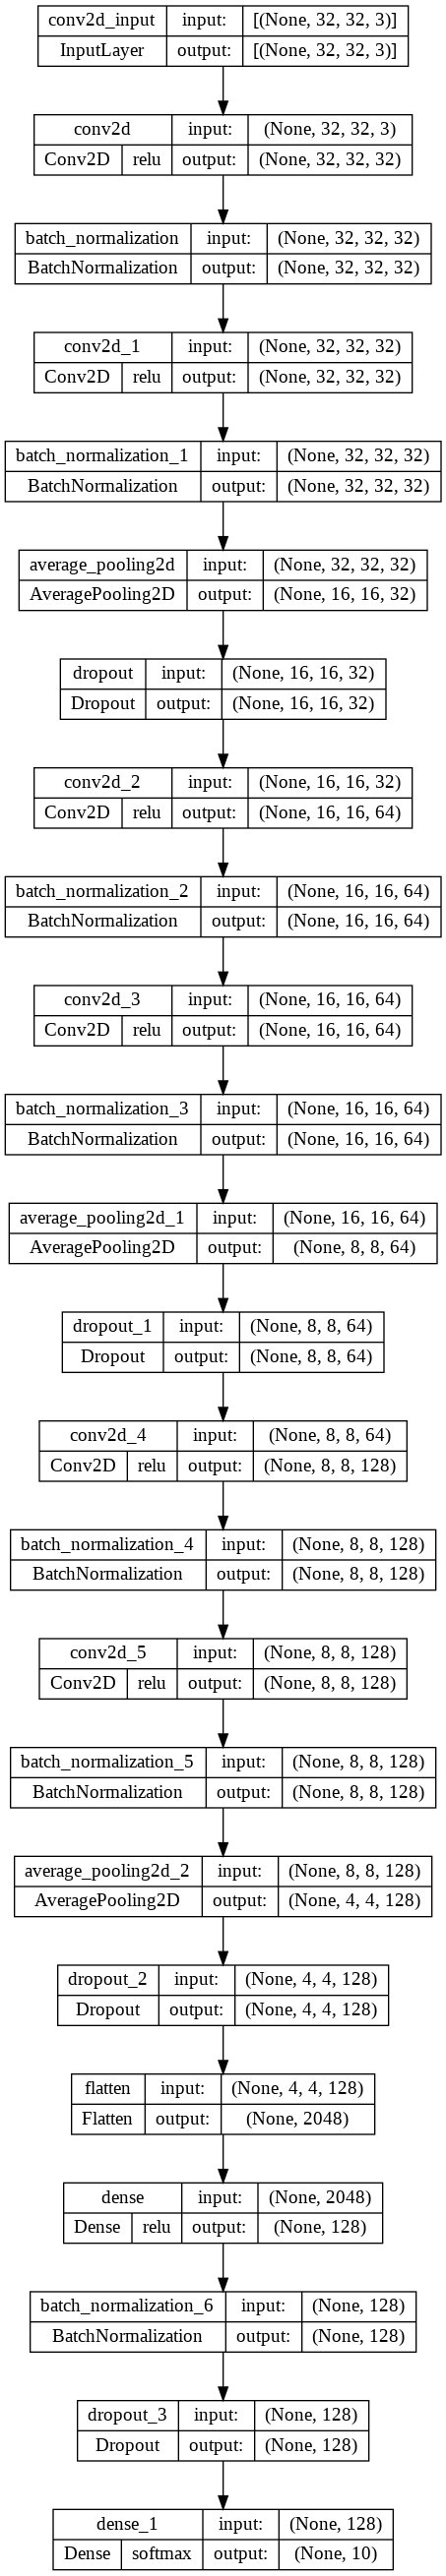

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

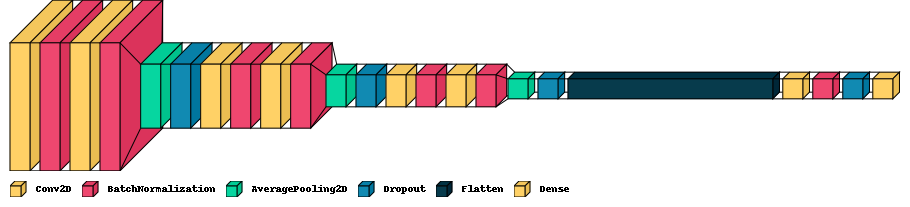

In [ ]:
visualkeras.layered_view(model, legend=True)

### Train and test

In [ ]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 21s 8ms/step - loss: 1.6906 - accuracy: 0.4164 - val_loss: 1.1368 - val_accuracy: 0.5915
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1490 - accuracy: 0.5934 - val_loss: 0.9130 - val_accuracy: 0.6743
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9574 - accuracy: 0.6659 - val_loss: 0.7767 - val_accuracy: 0.7316
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8577 - accuracy: 0.7024 - val_loss: 0.7576 - val_accuracy: 0.7363
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7971 - accuracy: 0.7254 - val_loss: 0.6369 - val_accuracy: 0.7798
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7413 - accuracy: 0.7469 - val_loss: 0.6114 - val_accuracy: 0.7887
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6910 - accuracy: 0.7648 - val_loss: 0.5787 - val_ac

### Results

This CNN model managed to achieve greater than 70% validation accuracy on the 3rd epoch, close to 82% on the 10th epoch, and settled at over 85% on the 20th epoch.

In [ ]:
history = pd.DataFrame(model_history.history)
history = history.rename(columns = {'accuracy': 'Accuracy', 'val_accuracy': 'Validation Accuracy', 'loss': 'Loss', 'val_loss': 'Validation Loss'})
hist_accuracy = history['Accuracy']
hist_val_accuracy = history['Validation Accuracy']
hist_loss = history['Loss']
hist_val_loss = history['Validation Loss']

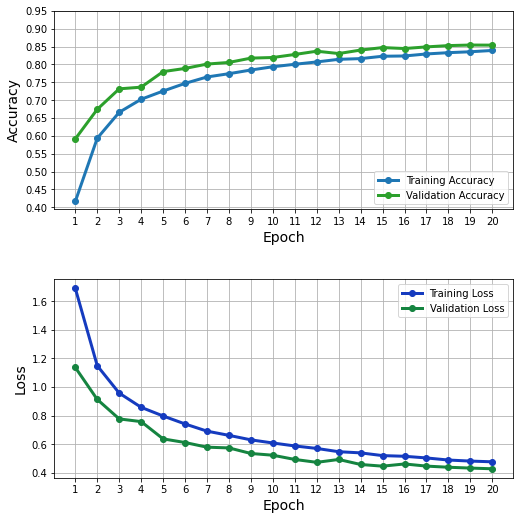

In [ ]:
# plot training accuracy and validation accuracy
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(hist_accuracy, color='tab:blue', marker='o', linewidth=3)
plt.plot(hist_val_accuracy, color='tab:green', marker='o', linewidth=3)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.xticks(np.arange(len(range(0, 20))), np.arange(1, len(range(0, 21))))
plt.yticks(np.arange(0.4, 1, 0.05))
plt.grid()

# plot training loss and validation loss
plt.subplot(212)
plt.plot(hist_loss, color='#153BBF', marker='o', linewidth=3)
plt.plot(hist_val_loss, color='#158440', marker='o', linewidth=3)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xticks(np.arange(len(range(0, 20))), np.arange(1, len(range(0, 21))))
plt.grid()

plt.tight_layout(pad=3.5)
plt.show()